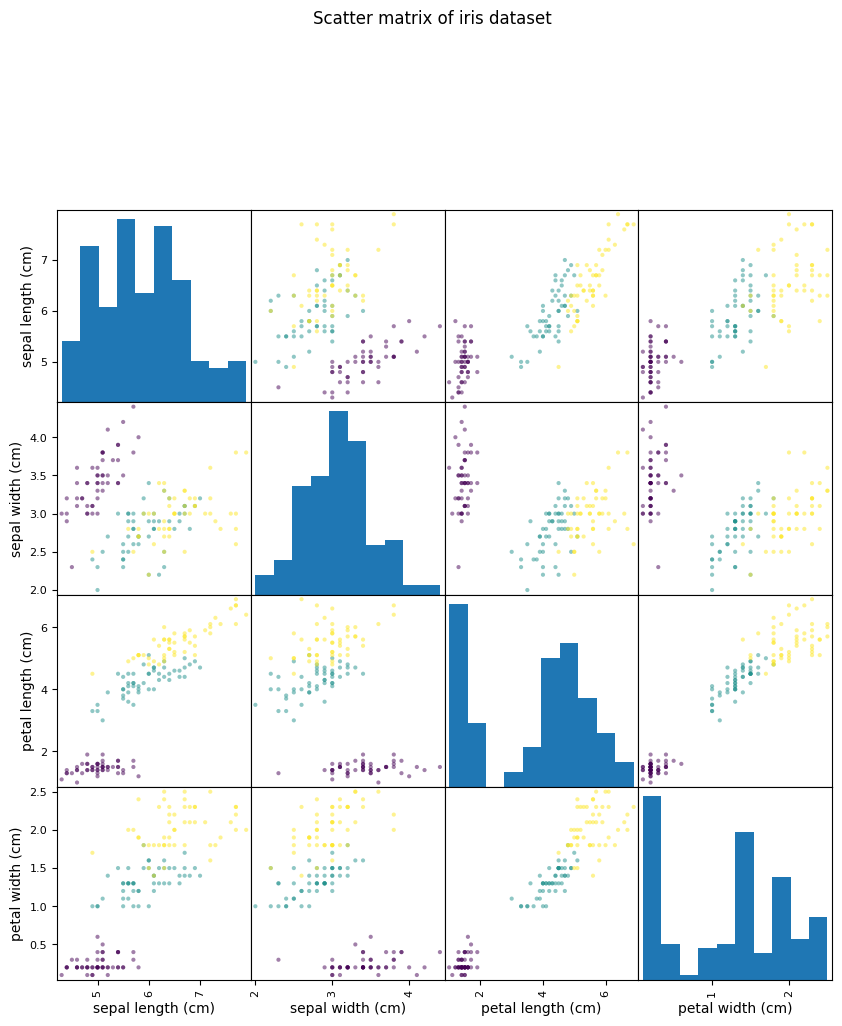

Accuracy: 1.0

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


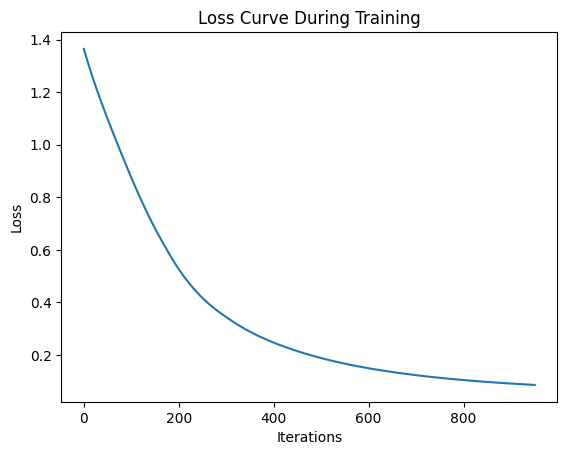

In [2]:
# %% [markdown]
## Классификация ирисов с помощью многослойного перцептрона

### Цель задачи
# Цель - продемонстрировать работу нейронной сети MLPClassifier на встроенном датасете iris.
# Необходимо предсказать вид ириса по его характеристикам.

# %% [markdown]
### Препроцессинг
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd

# Загрузка данных
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names
target_names = iris.target_names

# Визуализация данных
iris_df = pd.DataFrame(X, columns=feature_names)
iris_df['target'] = y
pd.plotting.scatter_matrix(iris_df.iloc[:, :4], c=y, figsize=(10, 10))
plt.suptitle('Scatter matrix of iris dataset', y=1.08)
plt.show()

# Разделение данных
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Масштабирование данных
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# %% [markdown]
### Обучение модели
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Создание и обучение модели
mlp = MLPClassifier(hidden_layer_sizes=(10,), activation='relu', max_iter=1000, random_state=42)
mlp.fit(X_train, y_train)

# %% [markdown]
### Результаты
# Предсказания на тестовых данных
y_pred = mlp.predict(X_test)

# Оценка модели
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=target_names))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Визуализация кривой обучения
plt.plot(mlp.loss_curve_)
plt.title("Loss Curve During Training")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.show()

# %% [markdown]
### Интерпретация результатов
# Модель показывает высокую точность (accuracy) на тестовой выборке.
# Кривая обучения демонстрирует стабильное уменьшение функции потерь.
# Матрица путаницы показывает, что модель хорошо справляется с классификацией всех трех видов ирисов.